In [1]:
import stim, pymatching as pm, numpy as np
from IPython.display import SVG
import matplotlib.pyplot as plt

there were 65 wrong predictions (logical errors) out of 100000 shots. p_L = 0.065 %


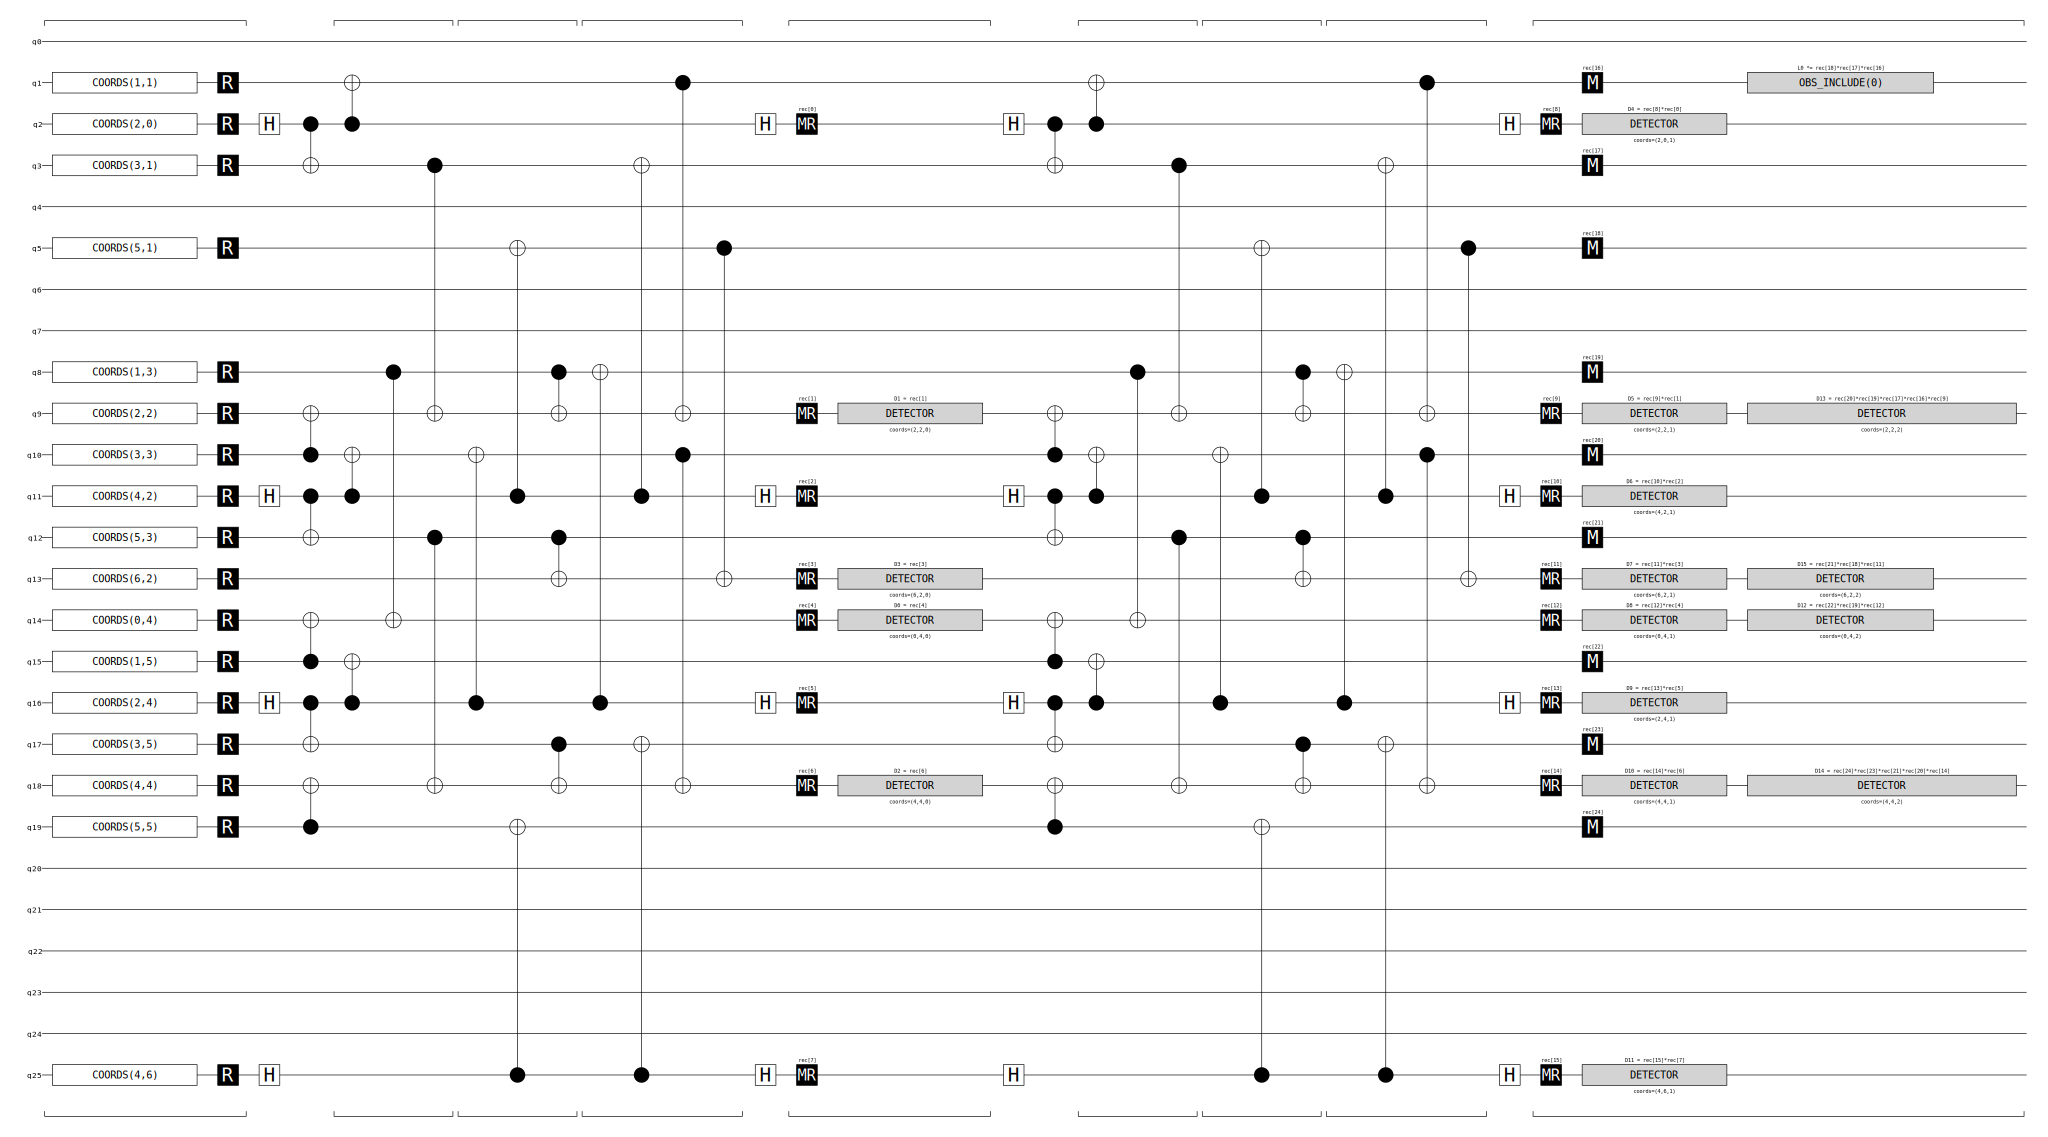

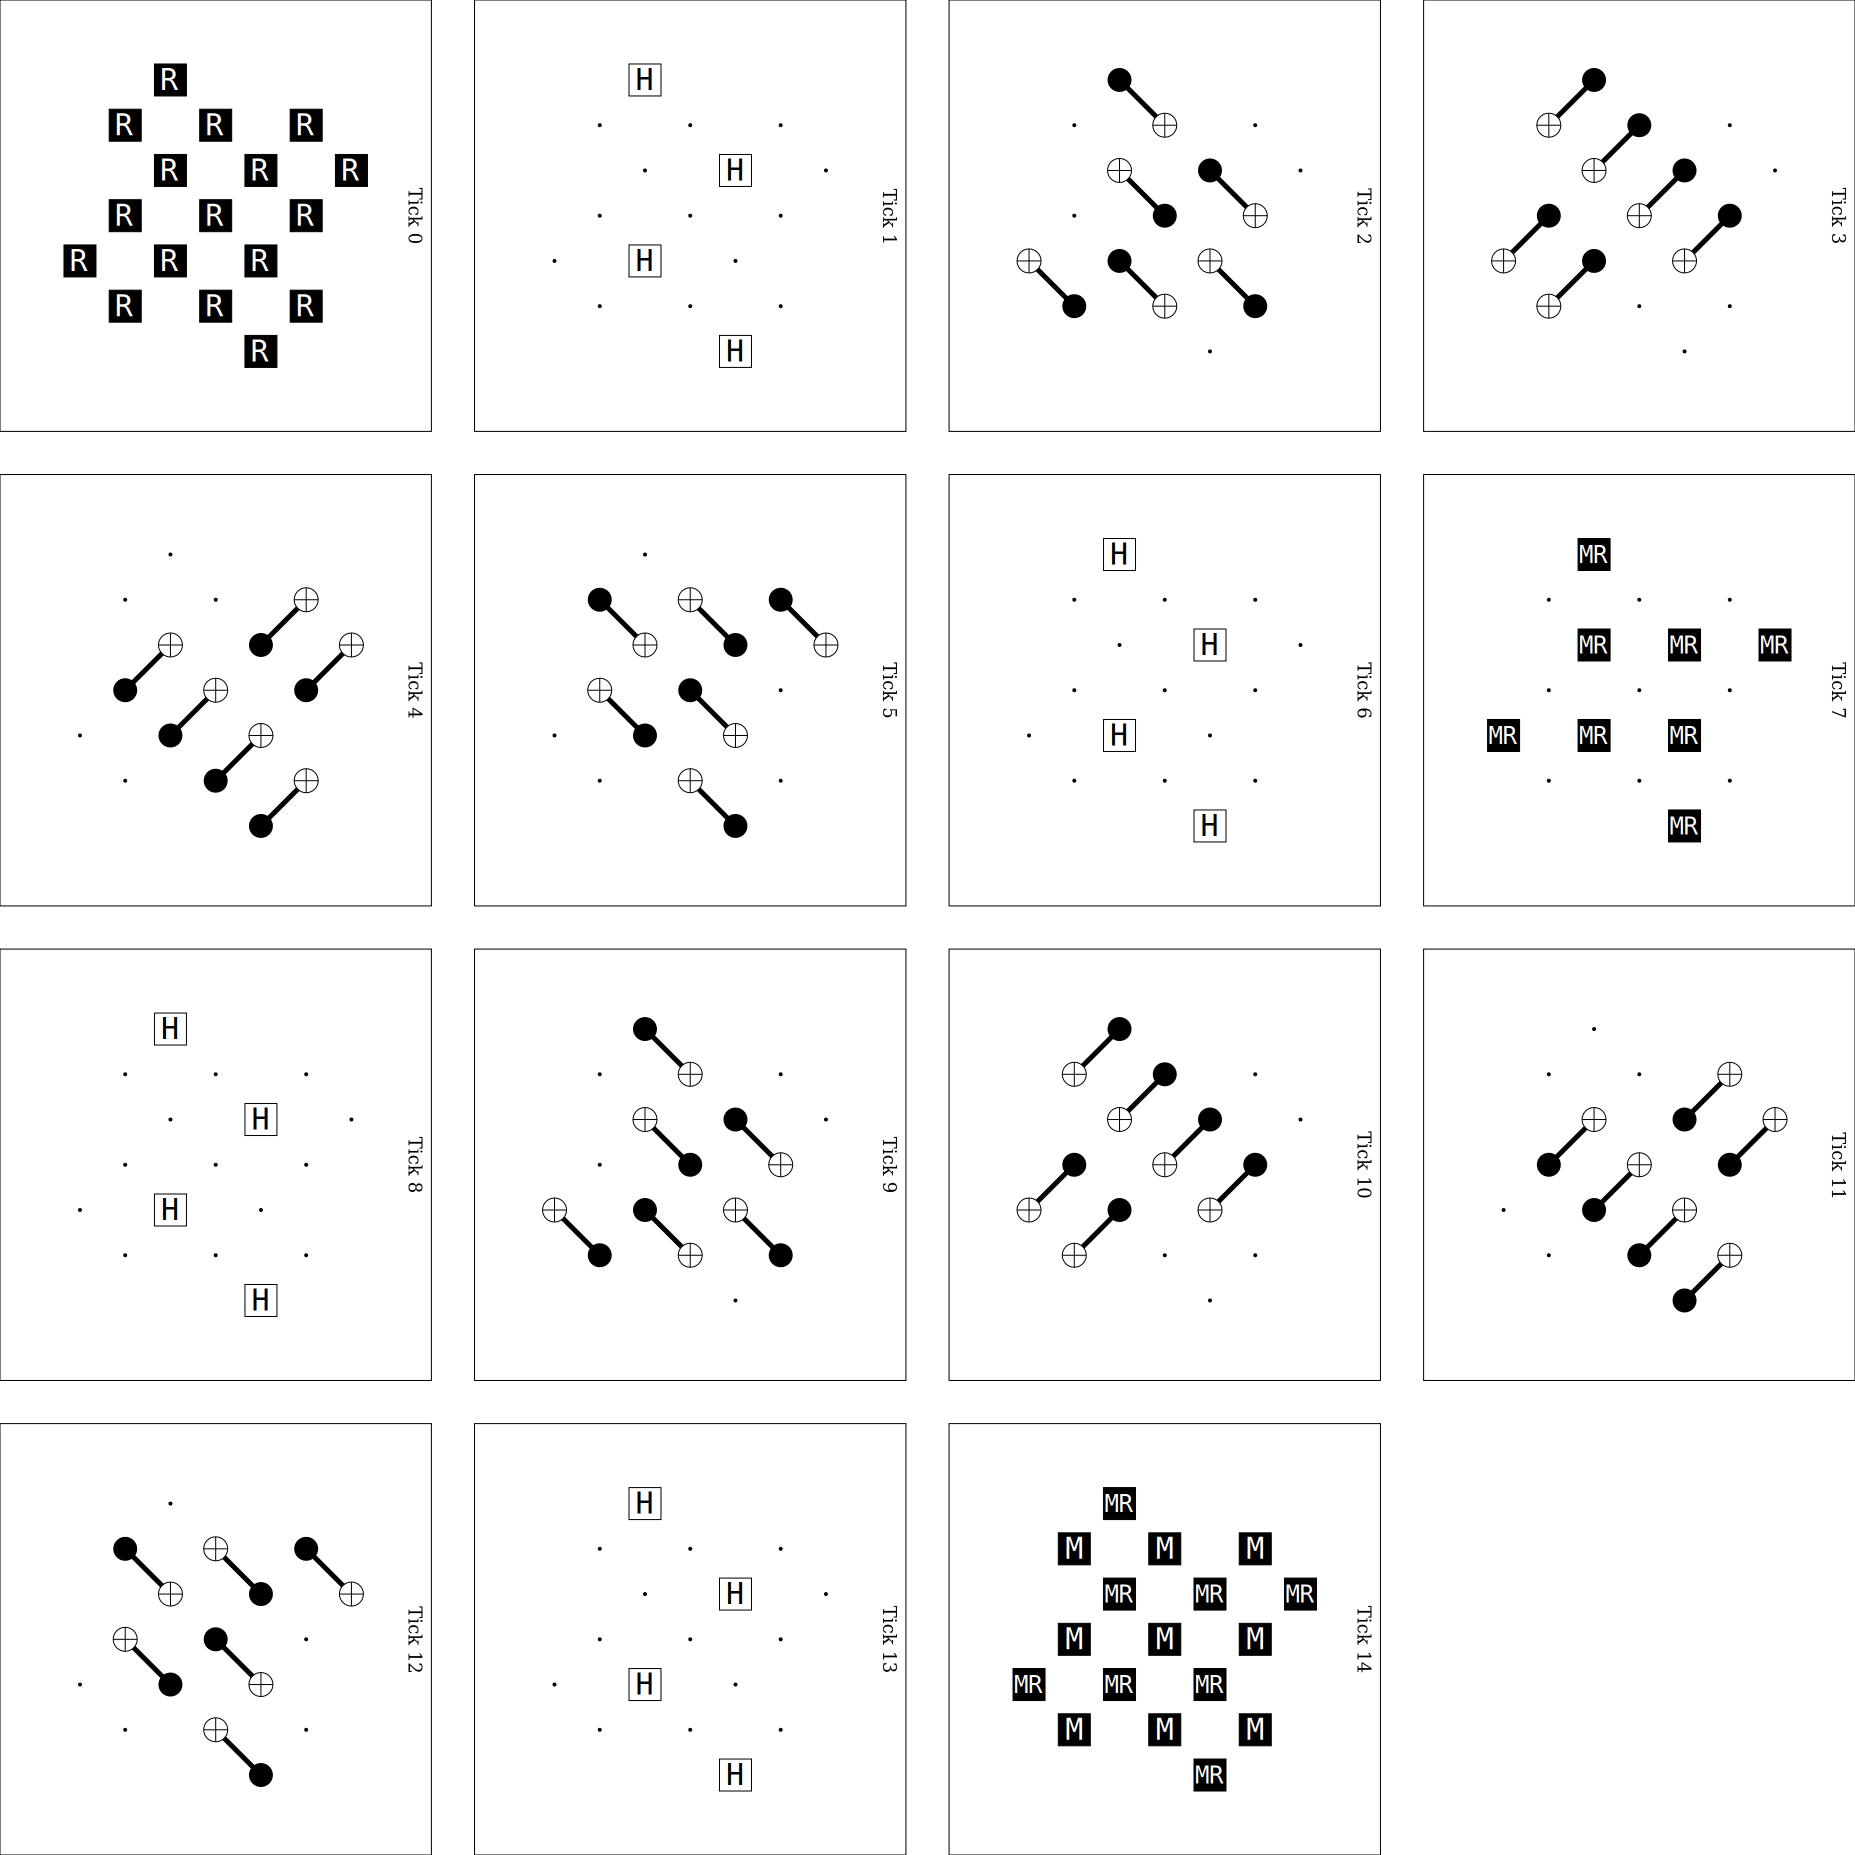

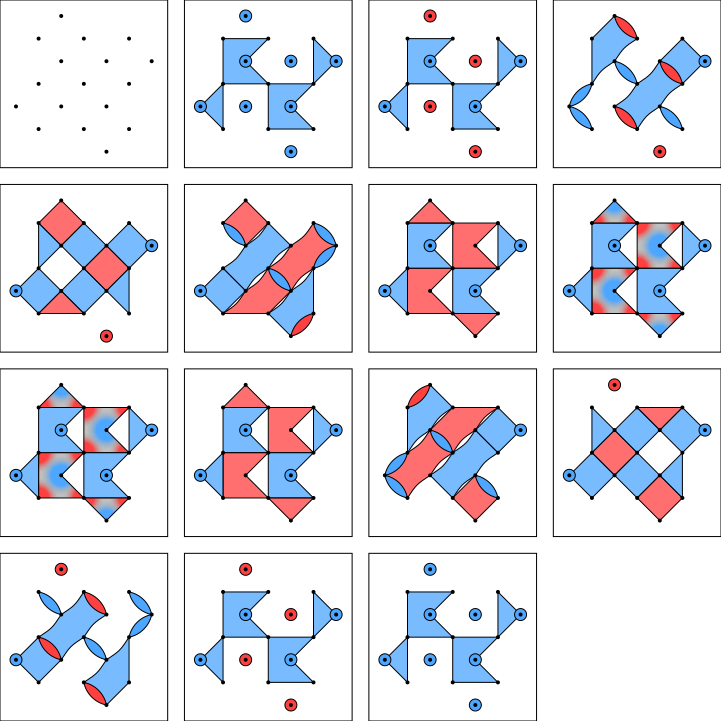

QUBIT_COORDS(1, 1) 1
QUBIT_COORDS(2, 0) 2
QUBIT_COORDS(3, 1) 3
QUBIT_COORDS(5, 1) 5
QUBIT_COORDS(1, 3) 8
QUBIT_COORDS(2, 2) 9
QUBIT_COORDS(3, 3) 10
QUBIT_COORDS(4, 2) 11
QUBIT_COORDS(5, 3) 12
QUBIT_COORDS(6, 2) 13
QUBIT_COORDS(0, 4) 14
QUBIT_COORDS(1, 5) 15
QUBIT_COORDS(2, 4) 16
QUBIT_COORDS(3, 5) 17
QUBIT_COORDS(4, 4) 18
QUBIT_COORDS(5, 5) 19
QUBIT_COORDS(4, 6) 25
R 1 3 5 8 10 12 15 17 19
X_ERROR(0.001) 1 3 5 8 10 12 15 17 19
R 2 9 11 13 14 16 18 25
X_ERROR(0.001) 2 9 11 13 14 16 18 25
TICK
DEPOLARIZE1(0.001) 1 3 5 8 10 12 15 17 19
H 2 11 16 25
DEPOLARIZE1(0.001) 2 11 16 25
TICK
CX 2 3 16 17 11 12 15 14 10 9 19 18
DEPOLARIZE2(0.001) 2 3 16 17 11 12 15 14 10 9 19 18
TICK
CX 2 1 16 15 11 10 8 14 3 9 12 18
DEPOLARIZE2(0.001) 2 1 16 15 11 10 8 14 3 9 12 18
TICK
CX 16 10 11 5 25 19 8 9 17 18 12 13
DEPOLARIZE2(0.001) 16 10 11 5 25 19 8 9 17 18 12 13
TICK
CX 16 8 11 3 25 17 1 9 10 18 5 13
DEPOLARIZE2(0.001) 16 8 11 3 25 17 1 9 10 18 5 13
TICK
H 2 11 16 25
DEPOLARIZE1(0.001) 2 11 16 25
TICK
X

In [19]:
def count_logical_errors(circuit: stim.Circuit, num_shots: int) -> int:
    # Sample the circuit.
    sampler = circuit.compile_detector_sampler()
    detection_events, observable_flips = sampler.sample(num_shots, separate_observables=True)

    # Configure a decoder using the circuit.
    detector_error_model = circuit.detector_error_model(decompose_errors=True)
    matcher = pm.Matching.from_detector_error_model(detector_error_model)

    # Run the decoder.
    predictions = matcher.decode_batch(detection_events)

    # Count the mistakes.
    num_errors = 0
    for shot in range(num_shots):
        actual_for_shot = observable_flips[shot]
        predicted_for_shot = predictions[shot]
        if not np.array_equal(actual_for_shot, predicted_for_shot):
            num_errors += 1
    return num_errors

c = stim.Circuit.generated(
    "surface_code:rotated_memory_z",
    rounds=2,
    distance=3,
    after_clifford_depolarization=0.001,
    after_reset_flip_probability=0.001,
    before_measure_flip_probability=0.001,
    before_round_data_depolarization=0.001)

num_shots = 100_000
num_logical_errors = count_logical_errors(c, num_shots)
print("there were", num_logical_errors, "wrong predictions (logical errors) out of", num_shots, "shots. p_L =", round(num_logical_errors / num_shots * 100, 5), "%")

display(c.without_noise().diagram("timeline-svg"))
display(c.without_noise().diagram("timeslice-svg"))
display(c.without_noise().diagram("detslice-svg"))

print(c)


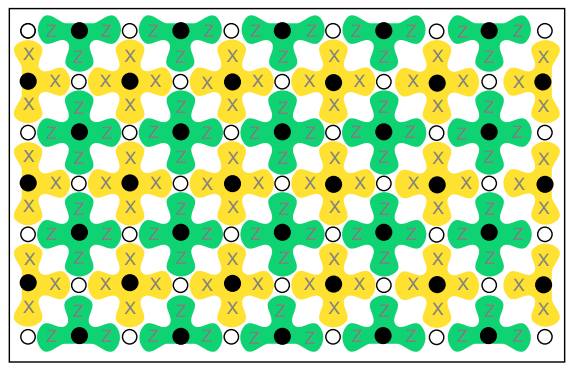

dat_qubits:  [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]
z_st_qubits:  [1, 3, 11, 13, 21, 23]
x_st_qubits:  [5, 7, 9, 15, 17, 19]
dat_coords:  [(0, 0), (0, 2), (0, 4), (1, 1), (1, 3), (2, 0), (2, 2), (2, 4), (3, 1), (3, 3), (4, 0), (4, 2), (4, 4)]
z_st_coords:  [(0, 1), (0, 3), (2, 1), (2, 3), (4, 1), (4, 3)]
x_st_coords:  [(1, 0), (1, 2), (1, 4), (3, 0), (3, 2), (3, 4)]


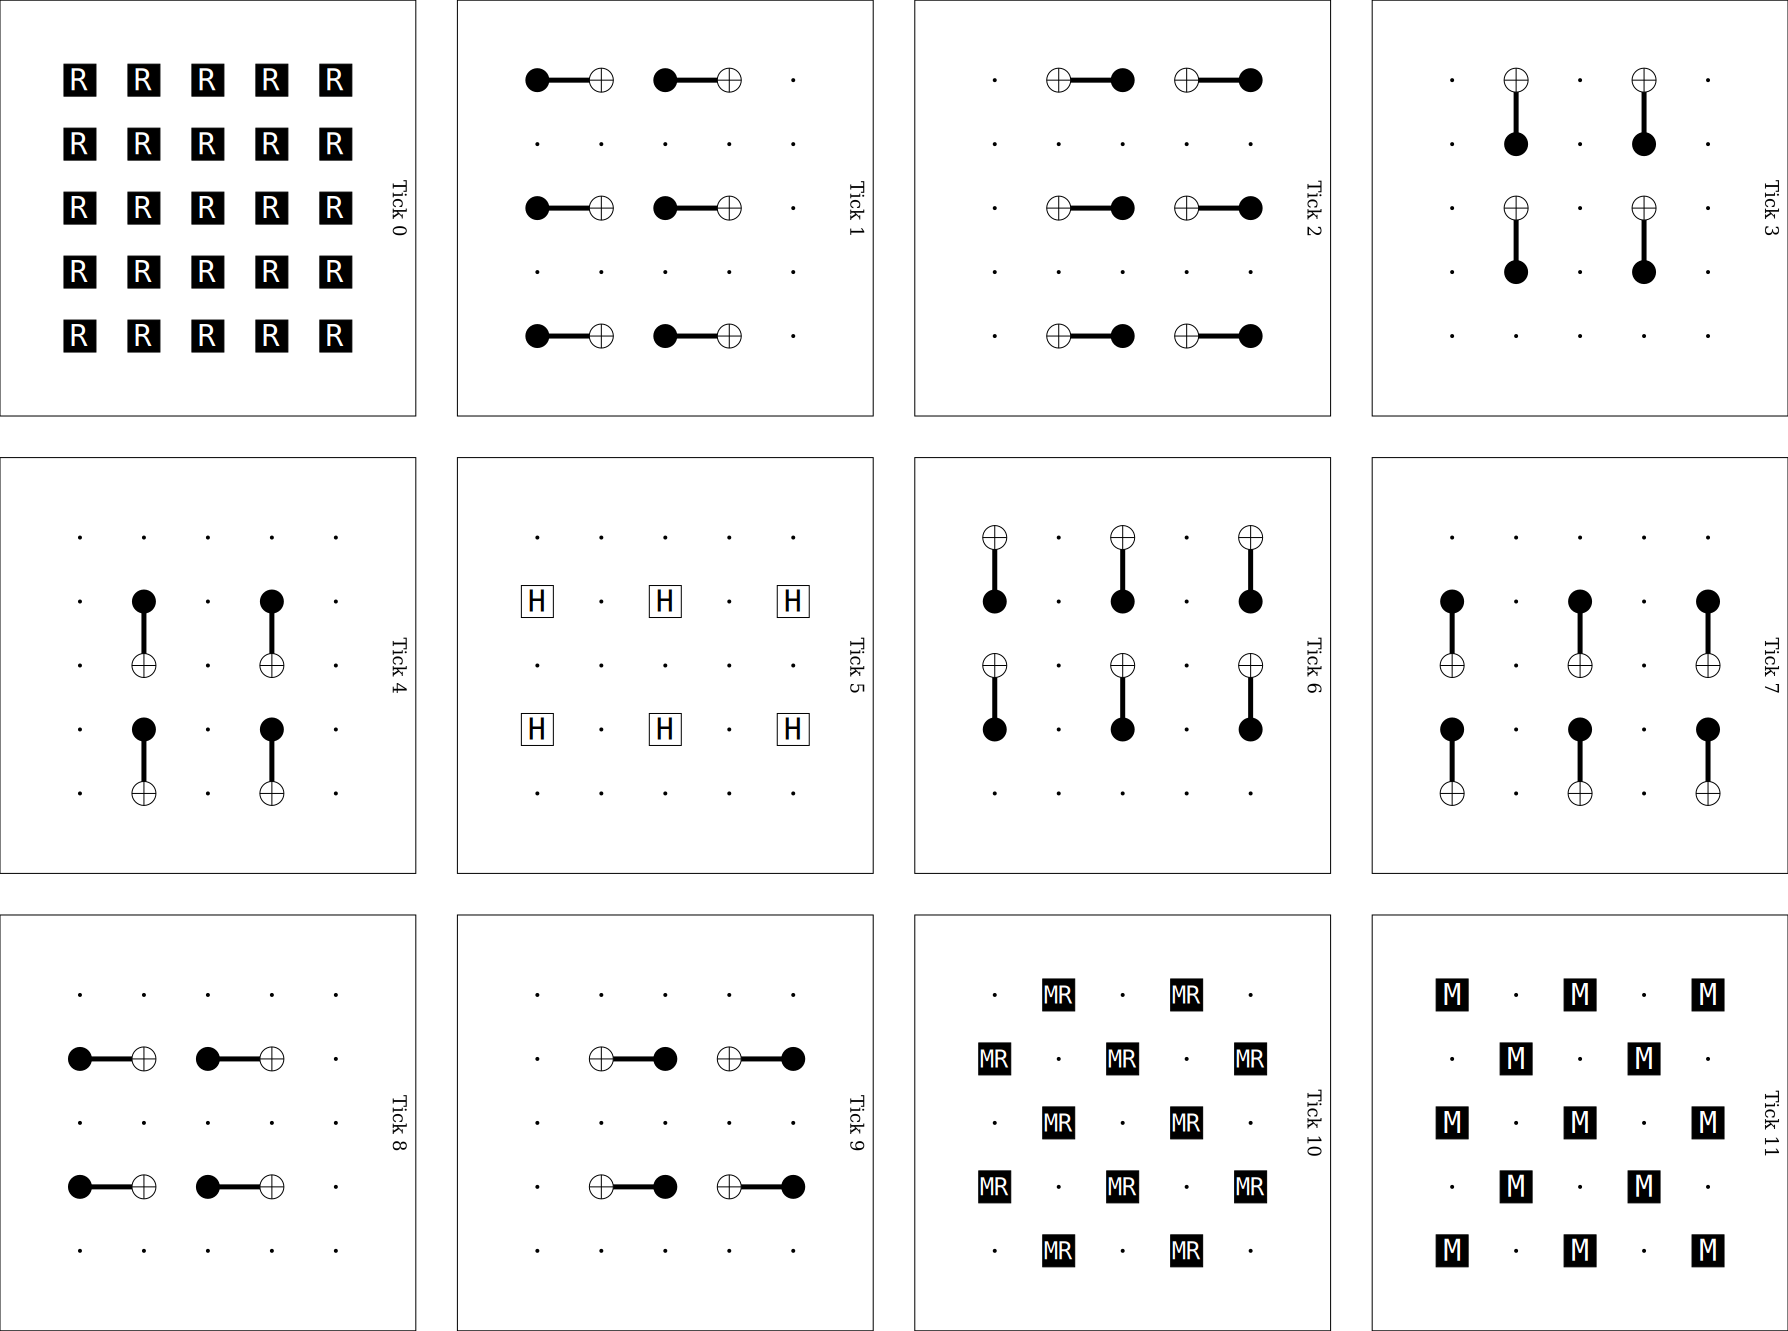

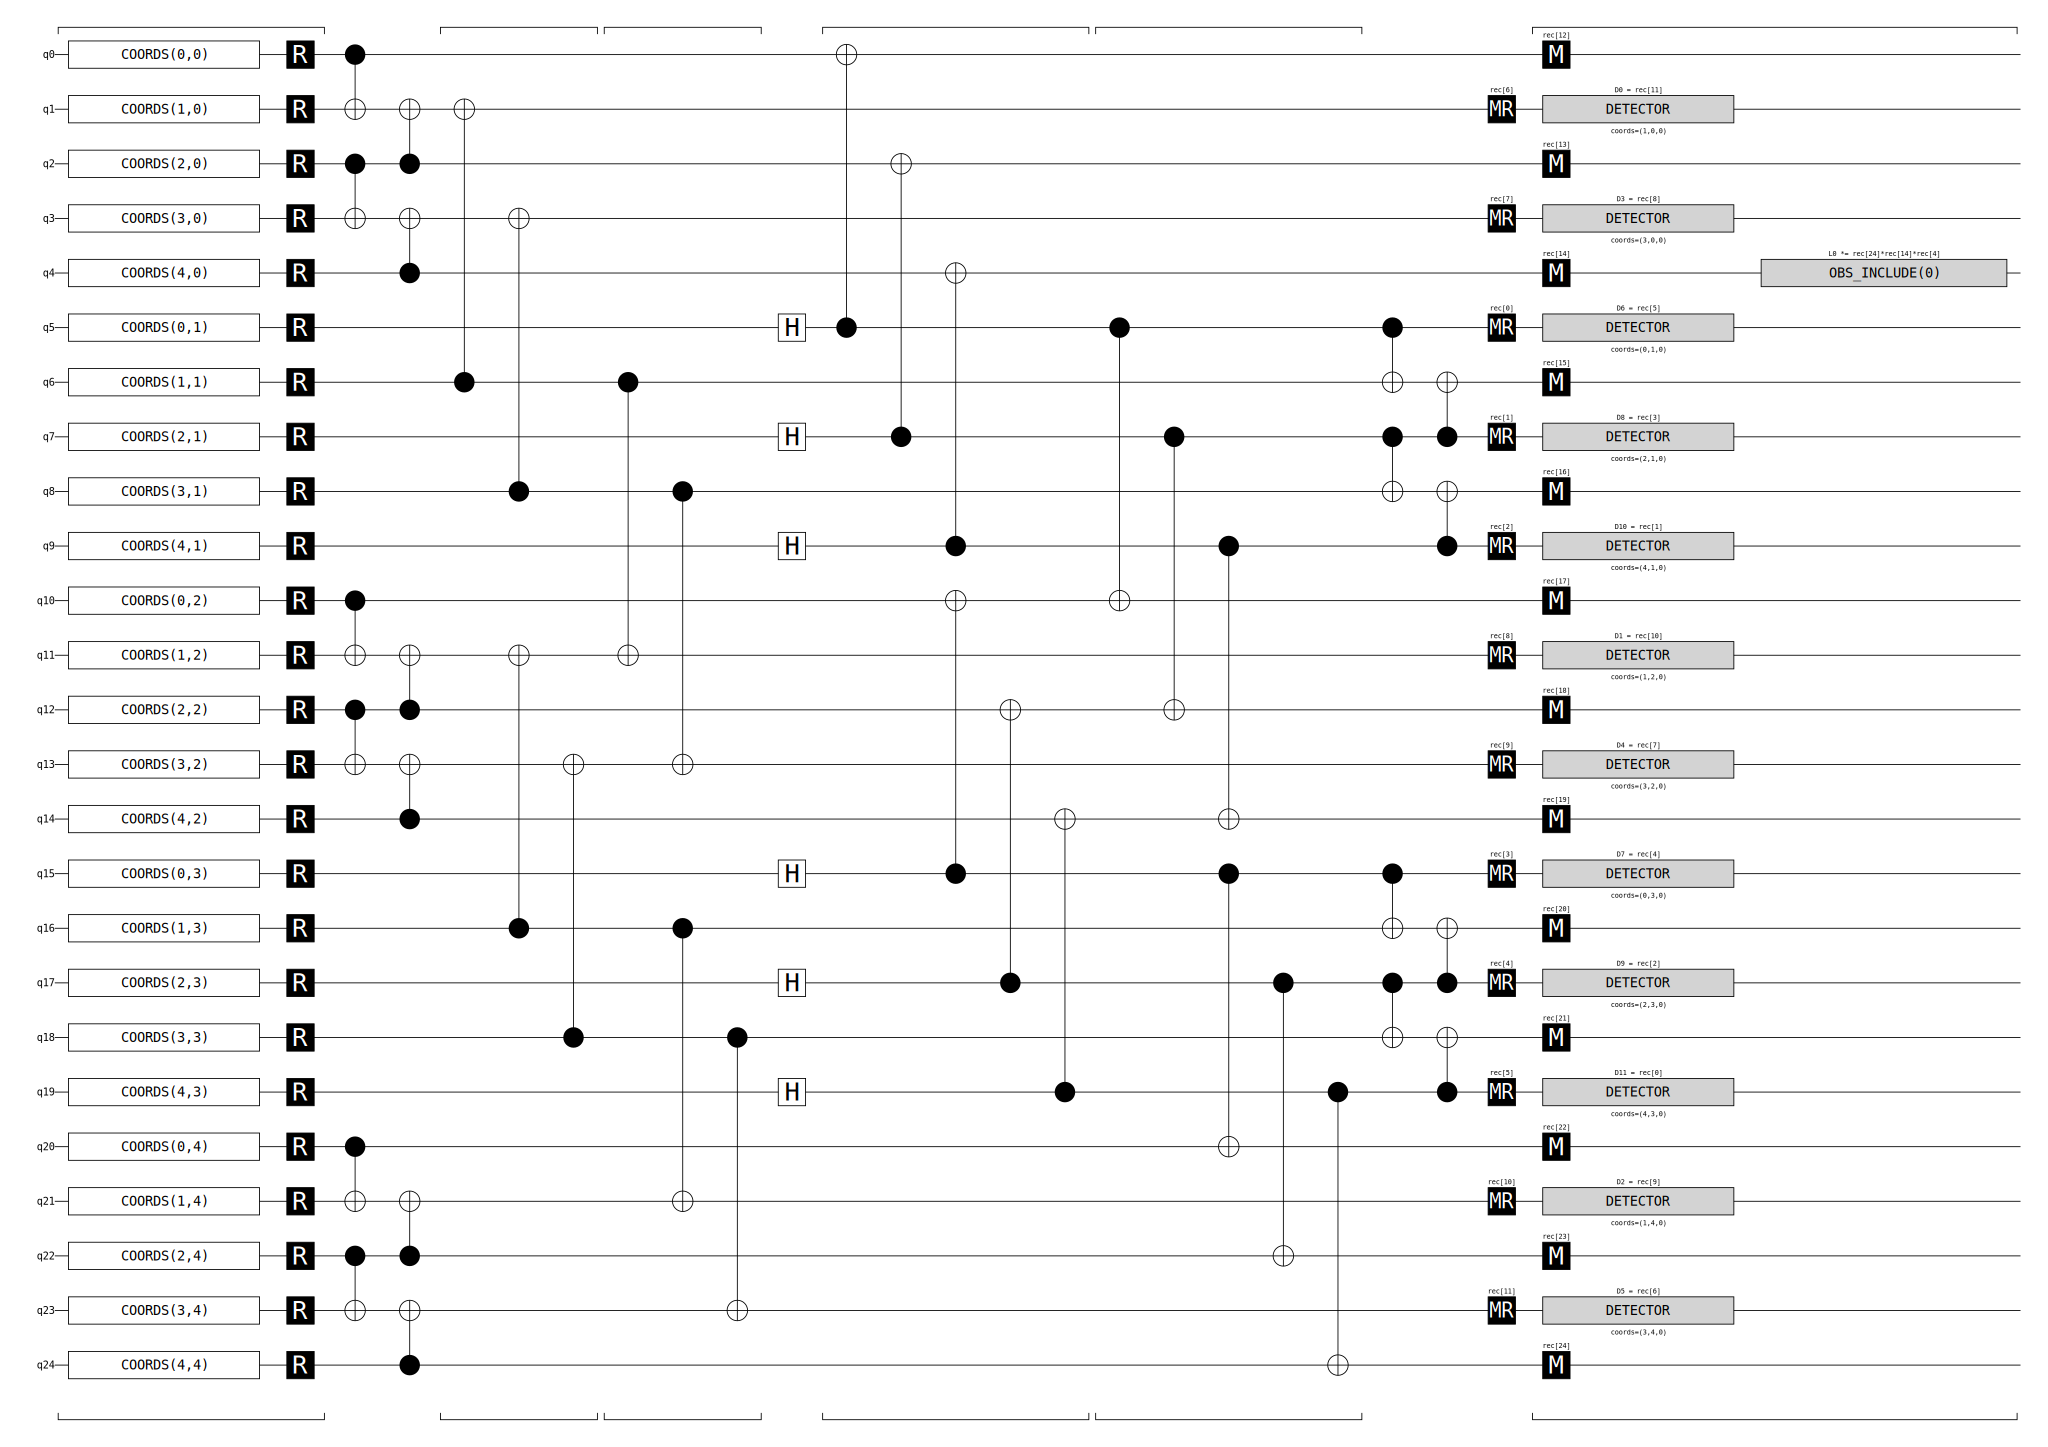

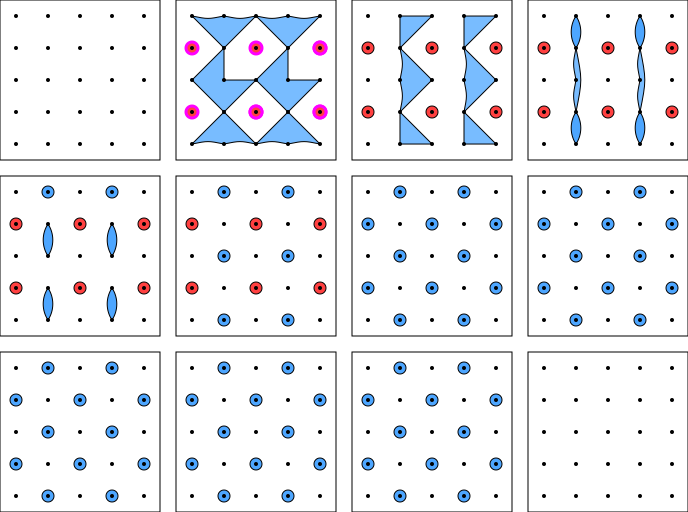

In [22]:
n = 3
L = n*2 - 1

c = stim.Circuit()
dat_coords = []
dat_qubits = []
for x in range(n):
    for y in range(n):
        dat_coords.append((2 * x, 2 * y))
        dat_qubits.append(2 * x * L + 2 * y)
    if x < n - 1:
        for y in range(n - 1):
            dat_coords.append((2 * x + 1, 2 * y + 1))
            dat_qubits.append((2 * x + 1) * L + 2 * y + 1)

z_st_coords = []
z_st_qubits = []
for x in range(n):
    for y in range(n - 1):
        z_st_coords.append((2 * x, 2 * y + 1))
        z_st_qubits.append(2 * x * L + 2 * y + 1)

x_st_coords = []
x_st_qubits = []
for x in range(n - 1):
    for y in range(n):
        x_st_coords.append((2 * x + 1, 2 * y))
        x_st_qubits.append((2 * x + 1) * L + 2 * y)

print("dat_qubits: ", dat_qubits)
print("z_st_qubits: ", z_st_qubits)
print("x_st_qubits: ", x_st_qubits)
print("dat_coords: ", dat_coords)
print("z_st_coords: ", z_st_coords)
print("x_st_coords: ", x_st_coords)

t = 0

# build circuit
for x in range(2 * n - 1):
    for y in range(2 * n - 1):
        c.append("QUBIT_COORDS", [x + L * y], [x, y])
c.append("R", list(range((2*n - 1) * (2*n - 1))))
c.append("TICK")

# one round of z stabilizers
for i in range(len(dat_qubits)):
    if dat_coords[i][0] % 2 == 0 and dat_coords[i][1] < L - 1:
        c.append("CNOT", [dat_qubits[i], dat_qubits[i] + 1])

c.append("TICK")        
for i in range(len(dat_qubits)):
    if dat_coords[i][0] % 2 == 0 and dat_coords[i][1] > 0:
        c.append("CNOT", [dat_qubits[i], dat_qubits[i] - 1])

c.append("TICK")        
for i in range(len(dat_qubits)):
    if dat_coords[i][0] % 2 == 1:
        c.append("CNOT", [dat_qubits[i], dat_qubits[i] - L])

c.append("TICK")
for i in range(len(dat_qubits)):
    if dat_coords[i][0] % 2 == 1:
        c.append("CNOT", [dat_qubits[i], dat_qubits[i] + L])
        
c.append("TICK")

# one round of x stabilizers
c.append("H", x_st_qubits)
c.append("TICK")
for i in range(len(dat_qubits)):
    if dat_coords[i][0] % 2 == 0 and dat_coords[i][0] < L - 1:
        c.append("CNOT", [dat_qubits[i] + L, dat_qubits[i]])

c.append("TICK")
for i in range(len(dat_qubits)):
    if dat_coords[i][0] % 2 == 0 and dat_coords[i][0] > 0:
        c.append("CNOT", [dat_qubits[i] - L, dat_qubits[i]])

c.append("TICK")
for i in range(len(dat_qubits)):
    if dat_coords[i][0] % 2 == 1:
        c.append("CNOT", [dat_qubits[i] - 1, dat_qubits[i]])

c.append("TICK")
for i in range(len(dat_qubits)):
    if dat_coords[i][0] % 2 == 1:
        c.append("CNOT", [dat_qubits[i] + 1, dat_qubits[i]])

c.append("TICK")

# one round of measurements
c.append("MR", x_st_qubits + z_st_qubits)
c.append("TICK")

# one round of detector measurements
if t == 0:
    for st in range(len(x_st_qubits + z_st_qubits)):
        c.append("DETECTOR", [stim.target_rec(-st-1)], [(x_st_coords + z_st_coords)[st][0], (x_st_coords + z_st_coords)[st][1], t])


# logical observable
c.append("M", dat_qubits)
targets = [stim.target_rec(-1 - k*2*L) for k in range(n)]
c.append("OBSERVABLE_INCLUDE", targets, 0)

display(c.diagram("timeslice-svg"))
display(c.diagram("timeline-svg"))
display(c.diagram("detslice-svg"))